In [5]:
# %%capture
# !pip install diffusers --upgrade
# !pip install invisible_watermark transformers accelerate safetensors
# !pip install matplotlib

In [33]:
!python --version

Python 3.9.10


# Text-to-image generation with DeciDiffusion and HuggingFace 🧨diffusers

Check out [the Space](https://huggingface.co/spaces/Deci/DeciDiffusion-v1-0) on HuggingFace and [the technical blog](https://deci.ai/blog/decidiffusion-1-0-3x-faster-than-stable-diffusion-same-quality/) for more information.

This notebook will demonstrate generations with DeciDiffusion and show how quick it is to generate images.

The end of the notebook will also have generations and timings of the same prompts for StableDiffusion 1.5

**Note:** All generation times shown below are from a single high-RAM, A100 GPU

In [6]:
import torch
import os
import time
from IPython.core.display import display, HTML

from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from diffusers import StableDiffusionPipeline

import os
import torch
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import time


C:\Users\f\AppData\Local\Temp\ipykernel_28200\2044984847.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# 1️⃣ Step 1: Load custom pipeline from DeciDiffusion repo

In [7]:
# It will take some time to load everything
deci_diffusion_pipeline = StableDiffusionPipeline.from_pretrained('Deci/DeciDiffusion-v1-0',
                                                   custom_pipeline='Deci/DeciDiffusion-v1-0',
                                                   torch_dtype=torch.float16
                                                   )

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# 2️⃣ Step 2:  Load custom unet from DeciDiffusion repo, set it to `pipeline` object's UNet

In [8]:
deci_diffusion_pipeline.unet = deci_diffusion_pipeline.unet.from_pretrained('Deci/DeciDiffusion-v1-0',
                                              subfolder='flexible_unet',
                                              torch_dtype=torch.float16)

# Move pipeline to device
deci_diffusion_pipeline = deci_diffusion_pipeline.to('cuda')

The config attributes {'act_fn': 'silu', 'addition_embed_type': None, 'addition_embed_type_num_heads': 64, 'addition_time_embed_dim': None, 'attention_head_dim': 8, 'attention_type': 'default', 'block_out_channels': [320, 640, 1280, 1280], 'center_input_sample': False, 'class_embed_type': None, 'class_embeddings_concat': False, 'configurations': {'add_downsample': [True, True, True], 'add_upsample': [True, True, False], 'add_upsample_mid_block': True, 'cross_attention_dim': 768, 'down_blocks_in_channels': [320, 320, 640], 'down_blocks_num_attentions': [0, 1, 3], 'down_blocks_num_resnets': [2, 2, 1], 'down_blocks_out_channels': [320, 640, 1280], 'mid_num_attentions': 2, 'mid_num_resnets': 4, 'mix_block_in_forward': True, 'num_attention_heads': 8, 'prev_output_channels': [1280, 1280, 640], 'resnet_act_fn': 'silu', 'resnet_eps': 1e-05, 'sample_size': 64, 'temb_dim': 1280, 'up_blocks_num_attentions': [6, 3, 0], 'up_blocks_num_resnets': [2, 3, 3]}, 'conv_in_kernel': 3, 'conv_out_kernel': 3,

# 3️⃣ Step 3: Generate Image

In [14]:
def text_to_image(pipeline, prompt):

    # Start the timer
    start_time = time.time()

    # Call the pipeline function directly
    result = pipeline([prompt], generator=torch.Generator("cuda").manual_seed(42))

    # Calculate and print the elapsed time
    elapsed_time = time.time() - start_time
    display(HTML(f'<span style="color: #3264ff; font-weight:bold;font-size: 20px;">Time taken to generate: {elapsed_time:.2f} seconds</span>'))

    img = result.images[0]

    filename = prompt.replace(' ', '_')
    if len(filename) > 100:  # Limit filename to 100 characters
        filename = filename[:100]

    # Incorporate the pipeline's class name into the filename
    pipeline_name = pipeline.__class__.__name__
    #save_path = os.path.join("/content", f"{pipeline_name}_{filename}.png")
    save_path = os.path.join("D:/deciDiffusion", f"{pipeline_name}_{filename}.png")
    img.save(save_path)

    # Display the saved image
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return save_path

  0%|          | 0/30 [00:00<?, ?it/s]

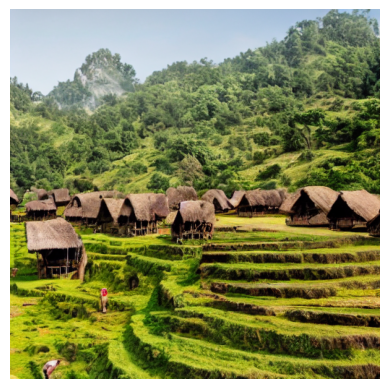

'D:/deciDiffusion\\DeciDiffusionPipeline_Create_an_image_of_a_picturesque_Indian_village_with_thatched-roof_huts,_and_lush_fields.png'

In [37]:
text_to_image(deci_diffusion_pipeline, "Create an image of a picturesque Indian village with thatched-roof huts, and lush fields")

  0%|          | 0/30 [00:00<?, ?it/s]

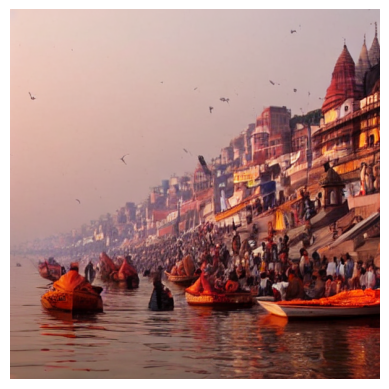

'D:/deciDiffusion\\DeciDiffusionPipeline_Illustrate_a_serene_view_of_the_Ganges_River_at_Varanasi,_with_ghats,_pilgrims,_and_the_evening_Gang.png'

In [35]:
text_to_image(deci_diffusion_pipeline, "Illustrate a serene view of the Ganges River at Varanasi, with ghats, pilgrims, and the evening Ganga Aarti.")

# Cat and Lion sitting together and enjoying ice cream

  0%|          | 0/30 [00:00<?, ?it/s]

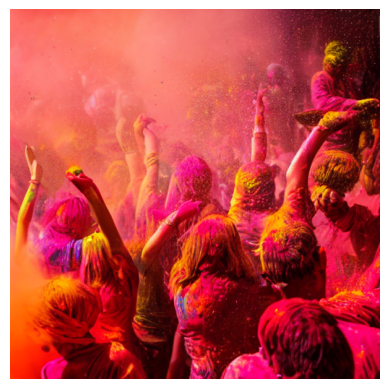

'D:/deciDiffusion\\DeciDiffusionPipeline_Create_a_colorful_image_capturing_the_spirit_of_the_Holi_festival,_with_people_throwing_vibrant_powd.png'

In [38]:
text_to_image(deci_diffusion_pipeline, "Create a colorful image capturing the spirit of the Holi festival, with people throwing vibrant powdered colors.")


  0%|          | 0/30 [00:00<?, ?it/s]

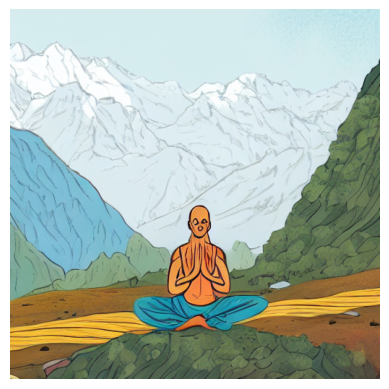

'D:/deciDiffusion\\DeciDiffusionPipeline_Illustrate_a_meditative_scene_of_a_yogi_practicing_yoga_amidst_the_serene_beauty_of_the_Himalayan_mo.png'

In [39]:
text_to_image(deci_diffusion_pipeline, "Illustrate a meditative scene of a yogi practicing yoga amidst the serene beauty of the Himalayan mountains.")

  0%|          | 0/30 [00:00<?, ?it/s]

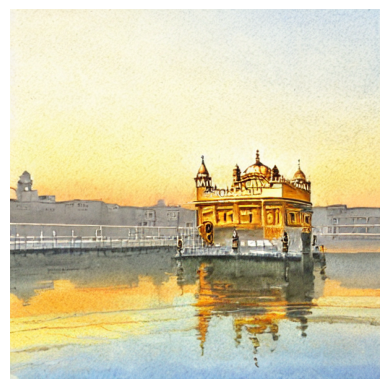

'D:/deciDiffusion\\DeciDiffusionPipeline_a_water_color_painting_of_the_Golden_Temple_awash_in_the_glow_of_morning_light_with_a_vanilla_sky.png'

In [26]:
text_to_image(deci_diffusion_pipeline, "a water color painting of the Golden Temple awash in the glow of morning light with a vanilla sky")

  0%|          | 0/30 [00:00<?, ?it/s]

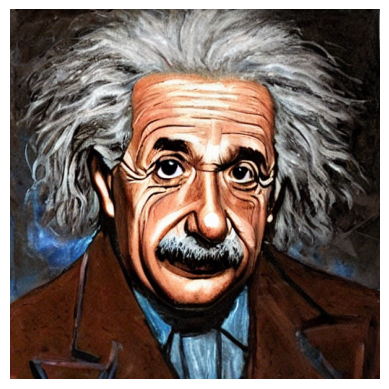

'/content/DeciDiffusionPipeline_a_realistic_portrait_of_albert_einstein_with_a_bewildered_expression.png'

In [ ]:
text_to_image(deci_diffusion_pipeline, "a realistic portrait of albert einstein with a bewildered expression")

  0%|          | 0/30 [00:00<?, ?it/s]

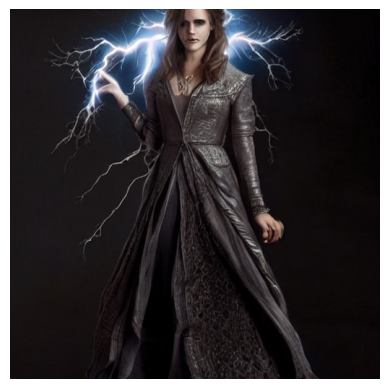

'/content/DeciDiffusionPipeline_Emma_Watson_as_a_powerful_mysterious_sorceress,_casting_lightning_magic,_detailed_clothing.png'

In [ ]:
text_to_image(deci_diffusion_pipeline, "Emma Watson as a powerful mysterious sorceress, casting lightning magic, detailed clothing")

  0%|          | 0/30 [00:00<?, ?it/s]

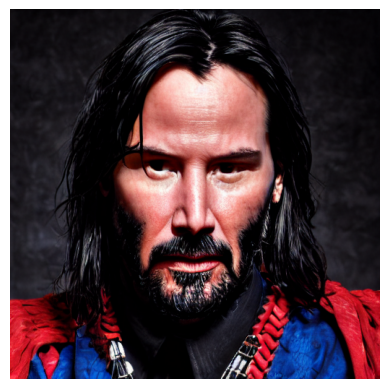

'/content/DeciDiffusionPipeline_Keanu_Reeves_portrait_photo_of_a_asia_old_warrior_chief,_tribal_panther_make_up,_blue_on_red,_side_p.png'

In [ ]:
prompt = "Keanu Reeves portrait photo of a asia old warrior chief, tribal panther make up, blue on red, side profile, looking away, serious eyes, 50mm portrait photography, hard rim lighting photography–beta –ar 2:3 –beta –upbeta –beta –upbeta –beta –upbeta"

text_to_image(deci_diffusion_pipeline, prompt)

  0%|          | 0/30 [00:00<?, ?it/s]

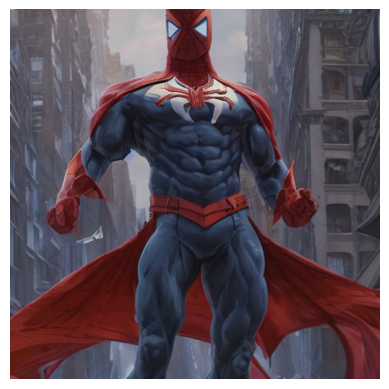

'/content/DeciDiffusionPipeline_clear_portrait_of_a_superhero_concept_between_spiderman_and_batman,_cottagecore!!,_background_hyper_.png'

In [ ]:
prompt = "clear portrait of a superhero concept between spiderman and batman, cottagecore!!, background hyper detailed, character concept, full body, dynamic pose, intricate, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration, art by artgerm and greg rutkowski and alphonse mucha"
text_to_image(deci_diffusion_pipeline, prompt)

  0%|          | 0/30 [00:00<?, ?it/s]

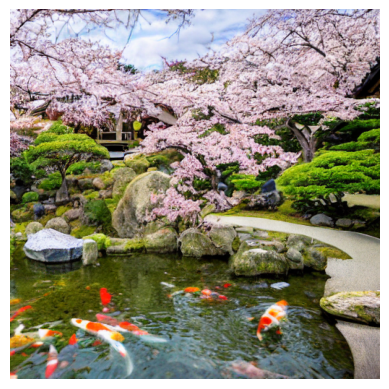

'D:/deciDiffusion\\DeciDiffusionPipeline_Generate_an_image_of_a_serene_Japanese_garden_with_a_koi_pond_and_cherry_blossoms..png'

In [31]:
prompt = "Generate an image of a serene Japanese garden with a koi pond and cherry blossoms."
text_to_image(deci_diffusion_pipeline, prompt)

  0%|          | 0/30 [00:00<?, ?it/s]

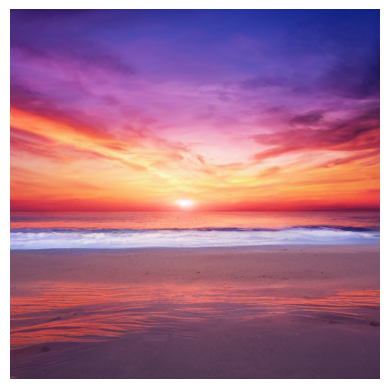

'D:/deciDiffusion\\DeciDiffusionPipeline_Visualize_a_peaceful_beach_at_sunset_with_gentle_waves_and_a_colorful_sky..png'

In [32]:

prompt = "Visualize a peaceful beach at sunset with gentle waves and a colorful sky."
text_to_image(deci_diffusion_pipeline, prompt)